In [1]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
import cv2

In [3]:
X = []
y = []

In [4]:
for i in os.listdir("RnE/src/2nd/faces"):
    if '_questions' in i:
        y.append(1.)
    else:
        y.append(0.)
    img = cv2.imread(f"RnE/src/2nd/faces/{i}")
    img = cv2.resize(img, (50, 50))
    X.append(img)

In [5]:
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(237, 50, 50, 3)
(237,)


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
train_img, test_img, train_labels, test_labels = train_test_split(X, y, test_size=0.2, shuffle=True)

In [58]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(50, 50, 3)))
    model.add(keras.layers.MaxPool2D((2, 2)))
    model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
    model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    return model

In [59]:
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [60]:
train_labels.shape

(189,)

In [61]:
model.fit(train_img, train_labels, epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1230 - acc: 0.9418
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 11/100
6/6 [=========================

In [62]:
model.evaluate(test_img, test_labels)

2/2 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 1.0000


[0.0, 1.0]

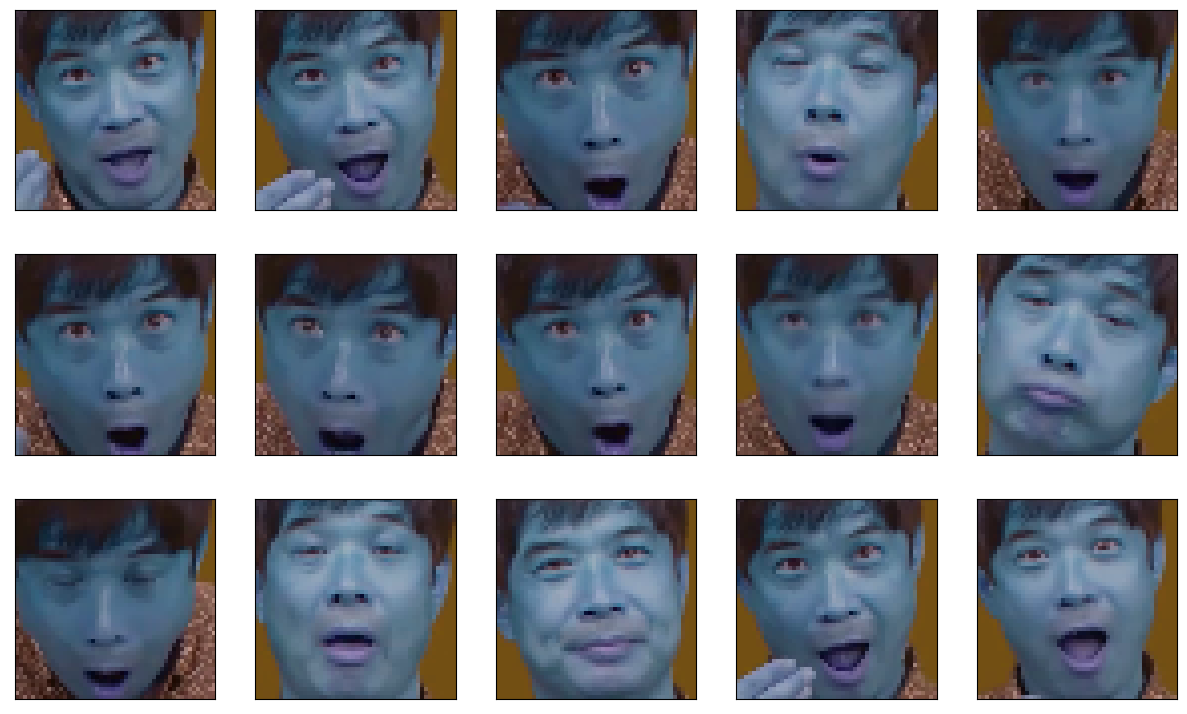

In [63]:
plt.figure(figsize=(15, 9))
for i in range(15):
    img_idx = np.random.randint(0, 188)
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[img_idx])

In [64]:
img = cv2.imread(f"RnE/src/2nd/eat_48.png")
img = cv2.resize(img, (50, 50))

[ WARN:0@1009.895] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('RnE/src/2nd/eat_48.png'): can't open/read file: check file path/integrity


error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


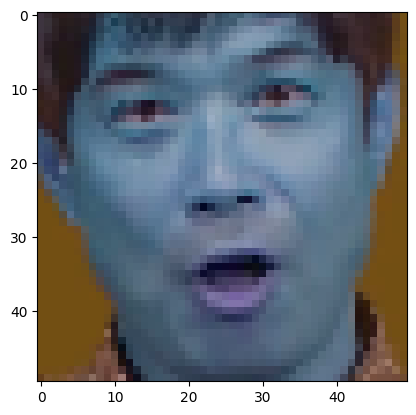

In [28]:
plt.imshow(img)

In [30]:
model.predict(np.array([img]))

1/1 [==============================] - 0s 54ms/step


array([[0.]], dtype=float32)